In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
import itertools

import tensorflow as tf

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
gimage = []
for i in range(1, 20):
    im = Image.open('./Images/image ('+ str(i) +').jpg').convert('L').resize((28, 28)) # Loading Images and Converting to Grayscale
    gimage.append(np.asarray(im)) # Appending in List after converting to np.array

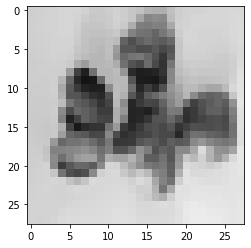

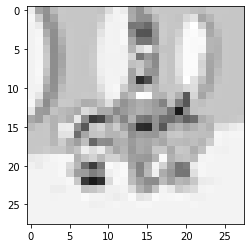

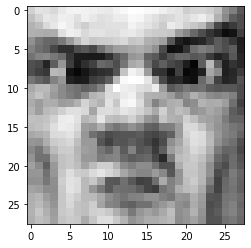

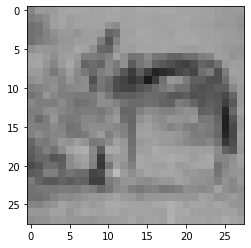

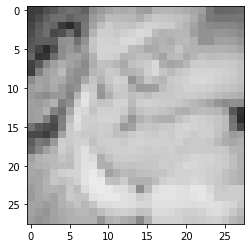

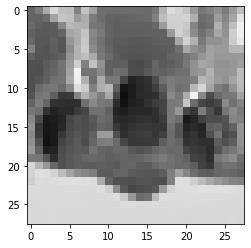

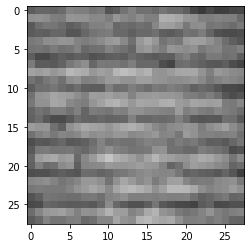

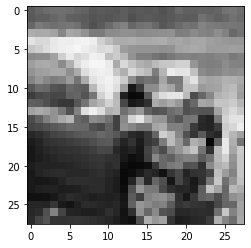

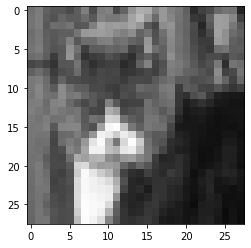

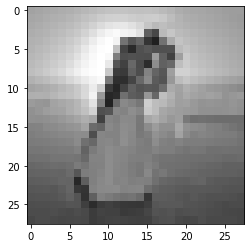

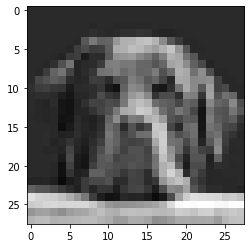

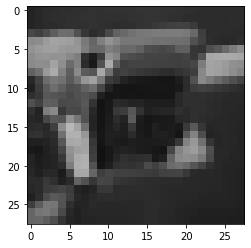

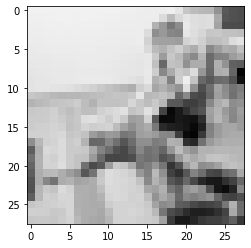

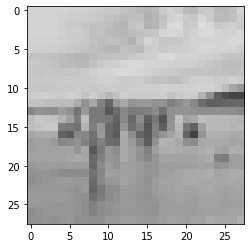

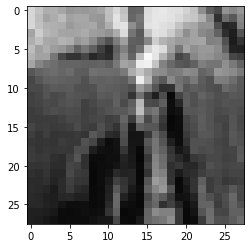

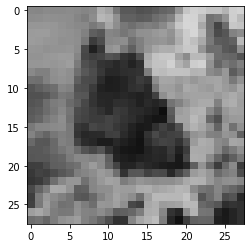

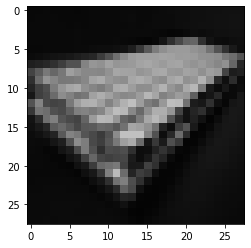

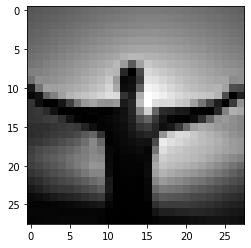

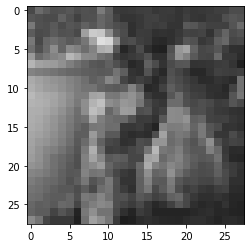

In [3]:
# Plotting images from arrays in gimage list
for j in range(len(gimage)):
    plt.imshow(gimage[j], cmap = 'gray', vmin = 0, vmax = 255)
    plt.show()

In [4]:
# flattening the arrays in gimage list to convert to dataframe
fimage = []
for k in range(len(gimage)):
    fimage.append(gimage[k].flatten())

In [5]:
# converting to dataframe
dataset = pd.DataFrame(fimage)

In [6]:
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,207,208,210,212,213,213,213,210,202,202,...,221,225,232,236,236,235,234,231,229,230
1,237,164,146,185,200,198,198,198,198,196,...,244,244,244,244,244,244,244,244,244,244
2,208,226,224,216,232,242,244,241,239,235,...,185,140,149,162,142,83,84,113,120,106
3,134,155,154,154,164,166,165,166,163,163,...,176,165,163,164,164,160,163,171,165,162
4,61,62,79,88,106,114,109,97,140,155,...,212,209,201,201,203,208,210,200,184,176


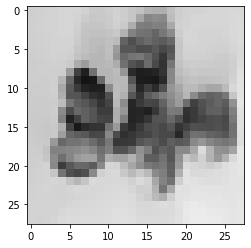

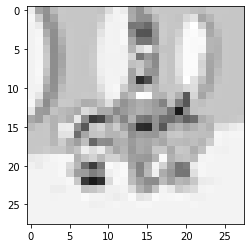

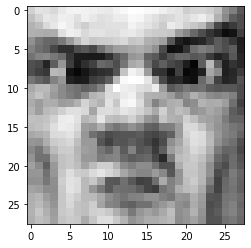

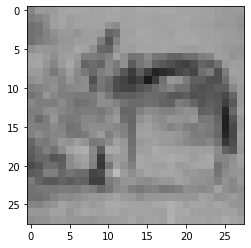

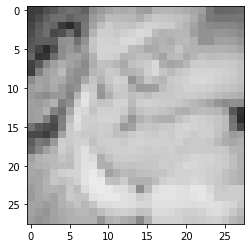

In [7]:
# Plotting images from the flattened fimage list for verification
for m in range(5):
    plt.imshow(fimage[m].reshape(28, 28), cmap = 'gray', vmin = 0, vmax = 255)
    plt.show()

In [8]:
# Adding labels to the dataset {0: null, 1: happy, 2: surprised}
# label = [[0.,1.,0.], [0.,0.,1.], [1.,0.,0.], [0.,0.,1.], [0.,0.,1.], [0.,1.,0.], [0.,1.,0.], [1.,0.,0.], [0.,0.,1.], [0.,0.,1.], [0.,0.,1.], [1.,0.,0.], [1.,0.,0.], [0.,0.,1.], [0.,1.,0.], [0.,0.,1.], [0.,1.,0.], [0.,0.,1.], [0.,1.,0.]]
label = [0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0]
dataset['label'] = label

In [9]:
# Saving dataframe to directory for further use
dataset.to_csv(r'dataset.csv')

In [10]:
dataset = pd.read_csv('dataset.csv').drop(columns = 'Unnamed: 0')
dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,207,208,210,212,213,213,213,210,202,202,...,225,232,236,236,235,234,231,229,230,0
1,237,164,146,185,200,198,198,198,198,196,...,244,244,244,244,244,244,244,244,244,1
2,208,226,224,216,232,242,244,241,239,235,...,140,149,162,142,83,84,113,120,106,2
3,134,155,154,154,164,166,165,166,163,163,...,165,163,164,164,160,163,171,165,162,1
4,61,62,79,88,106,114,109,97,140,155,...,209,201,201,203,208,210,200,184,176,1


In [11]:
dataset['label']

0     0
1     1
2     2
3     1
4     1
5     0
6     0
7     2
8     1
9     1
10    1
11    2
12    2
13    1
14    0
15    1
16    0
17    1
18    0
Name: label, dtype: int64

In [12]:
dataset.shape

(19, 785)

In [13]:
x = dataset.drop(columns = 'label')
x.shape

(19, 784)

In [14]:
X = dataset.drop(columns = 'label')
y = dataset['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [17]:
y_train = tf.one_hot(y_train, 3)
y_test = tf.one_hot(y_test, 3)

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(13, 28, 28, 1) (13, 3) (6, 28, 28, 1) (6, 3)


In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [21]:
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

In [22]:
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(3, activation = "softmax"))

In [23]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [24]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13, 28, 28, 1) (6, 28, 28, 1) (13, 3) (6, 3)


In [27]:
history = model.fit(X_train, y_train, batch_size = 2, epochs = 20, validation_data = (X_test, y_test), verbose = 2)

Epoch 1/20
7/7 - 1s - loss: 31.0880 - accuracy: 0.2308 - val_loss: 2.3177 - val_accuracy: 0.1667
Epoch 2/20
7/7 - 0s - loss: 2.5851 - accuracy: 0.4615 - val_loss: 1.9106 - val_accuracy: 0.3333
Epoch 3/20
7/7 - 0s - loss: 1.0754 - accuracy: 0.4615 - val_loss: 1.0973 - val_accuracy: 0.3333
Epoch 4/20
7/7 - 0s - loss: 2.5568 - accuracy: 0.5385 - val_loss: 1.5742 - val_accuracy: 0.3333
Epoch 5/20
7/7 - 0s - loss: 1.0356 - accuracy: 0.4615 - val_loss: 1.4359 - val_accuracy: 0.3333
Epoch 6/20
7/7 - 0s - loss: 1.1778 - accuracy: 0.4615 - val_loss: 1.2673 - val_accuracy: 0.3333
Epoch 7/20
7/7 - 0s - loss: 0.9661 - accuracy: 0.3846 - val_loss: 1.5159 - val_accuracy: 0.3333
Epoch 8/20
7/7 - 0s - loss: 1.0742 - accuracy: 0.5385 - val_loss: 1.4009 - val_accuracy: 0.3333
Epoch 9/20
7/7 - 0s - loss: 1.0593 - accuracy: 0.4615 - val_loss: 1.1706 - val_accuracy: 0.3333
Epoch 10/20
7/7 - 0s - loss: 1.1214 - accuracy: 0.4615 - val_loss: 2.2162 - val_accuracy: 0.3333
Epoch 11/20
7/7 - 0s - loss: 1.0830 - 

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [29]:
datagen.fit(X_train)

In [30]:
print(history.history)

{'loss': [31.087982177734375, 2.585083484649658, 1.0753746032714844, 2.556833028793335, 1.0356119871139526, 1.177750825881958, 0.9661179780960083, 1.0741758346557617, 1.0592682361602783, 1.1213538646697998, 1.0829664468765259, 1.6217753887176514, 1.0344955921173096, 0.9274314641952515, 0.7963706254959106, 0.5592663884162903, 1.0908727645874023, 1.919561505317688, 0.4025065302848816, 0.4491156339645386], 'accuracy': [0.23076923191547394, 0.4615384638309479, 0.4615384638309479, 0.5384615659713745, 0.4615384638309479, 0.4615384638309479, 0.38461539149284363, 0.5384615659713745, 0.4615384638309479, 0.4615384638309479, 0.6153846383094788, 0.4615384638309479, 0.5384615659713745, 0.6153846383094788, 0.6153846383094788, 0.692307710647583, 0.6153846383094788, 0.4615384638309479, 0.9230769276618958, 0.8461538553237915], 'val_loss': [2.317700147628784, 1.9105762243270874, 1.097281575202942, 1.5742197036743164, 1.4358612298965454, 1.2672605514526367, 1.5158854722976685, 1.4009289741516113, 1.17057

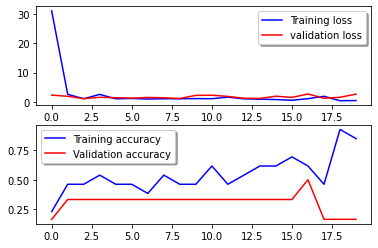

In [31]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [32]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

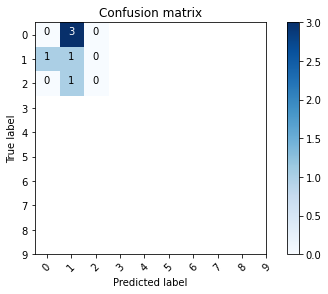

In [33]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
Y_true = np.argmax(y_test, axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [34]:
results = model.predict(X_test)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name="Label")